In [60]:
import pandas as pd
import numpy as np
import seaborn as sns

In [61]:
try:
    df=pd.read_csv('F:\my data science\ml_prac\myexperiments\datasets\sleeplifestyle.csv')
except:
    df=pd.read_csv(r'E:\Users\anshul\Desktop\ml_prac\datasets\sleeplifestyle.csv')

df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [62]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [63]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna(0)

In [64]:
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0


In [65]:
df2=df.copy()

In [66]:
df.drop('Person ID',inplace=True,axis=1)

In [67]:
df['good_sleep']=''

In [68]:
for i in range(0,len(df)):
    if df['Quality of Sleep'][i]>6:
        df.loc[i,'good_sleep']=1
    else:
        df.loc[i,'good_sleep']=0



In [69]:
df['good_sleep'].value_counts()

good_sleep
1    257
0    117
Name: count, dtype: int64

In [70]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,good_sleep
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1


In [71]:
df1=df.copy()

In [72]:
df=pd.get_dummies(df,dtype=float,drop_first=True)

In [73]:
from sklearn.feature_selection import SelectKBest,chi2,VarianceThreshold

In [74]:
chi2_features=SelectKBest(chi2,k=30)
x_best_features=chi2_features.fit_transform(df.drop('good_sleep_1',axis=1),df['good_sleep_1'])

In [75]:
print('shape:',df.drop('good_sleep_1',axis=1).shape[1])
print('reduced_shape:',x_best_features.shape[1])

shape: 47
reduced_shape: 30


In [76]:
vt=VarianceThreshold(threshold=0.95)
vt.fit(df.drop('good_sleep_1',axis=1))
vt.get_support()


array([ True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [77]:
vt.get_feature_names_out()

array(['Age', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'], dtype=object)

In [78]:
pd.DataFrame(df.loc[:,('Age', 'Quality of Sleep', 'Physical Activity Level','Stress Level', 'Heart Rate', 'Daily Steps')],df['good_sleep_1']).reset_index()

,good_sleep_1,Age,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,0.0,27,6,42,6,77,4200
1,0.0,27,6,42,6,77,4200
2,0.0,27,6,42,6,77,4200
3,0.0,27,6,42,6,77,4200
4,0.0,27,6,42,6,77,4200
...,...,...,...,...,...,...,...
369,1.0,28,6,60,8,75,10000
370,1.0,28,6,60,8,75,10000
371,1.0,28,6,60,8,75,10000
372,1.0,28,6,60,8,75,10000


In [79]:
df2.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

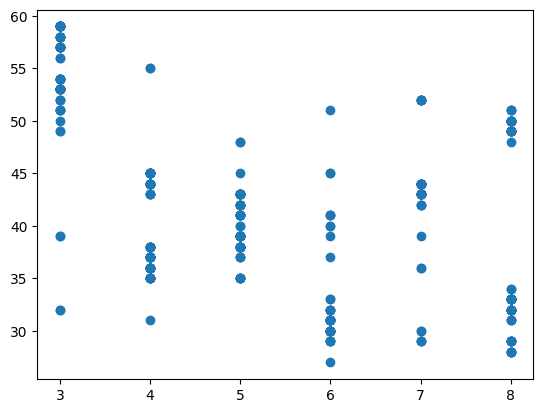

In [108]:
plt.scatter(df['Stress Level'],df['Age'])

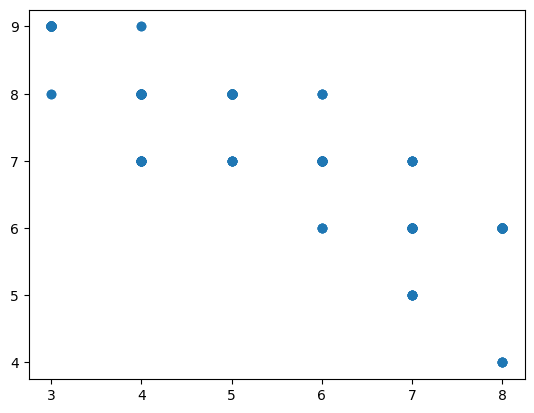

In [107]:
plt.scatter(df['Stress Level'],df['Quality of Sleep'])

In [80]:
class occ_hazard:
    def __init__(self,db):
        self.db=db
    def occ_sleep(self,occ):
        a=self.db[self.db['Occupation']==occ]['Sleep Duration'].mean()
        print('avg sleep',a)
    


In [81]:
a1=occ_hazard(df2)
a1.occ_sleep('Doctor')

avg sleep 6.970422535211269


In [92]:
class diabitie_detail:
    def __init__(self,db):
        self.db=db
    def bpdetails(self):
        self.db['bp_Systolic']=self.db['Blood Pressure'].str.split('/',expand=True)[0]
        self.db['bp_Diastolic']=self.db['Blood Pressure'].str.split('/',expand=True)[1]
        return self.db.loc[:,('Blood Pressure','bp_Systolic','bp_Diastolic')]


In [93]:
c1=diabitie_detail(df2)
c1.bpdetails()


,Blood Pressure,bp_Systolic,bp_Diastolic
0,126/83,126,83
1,125/80,125,80
2,125/80,125,80
3,140/90,140,90
4,140/90,140,90
...,...,...,...
369,140/95,140,95
370,140/95,140,95
371,140/95,140,95
372,140/95,140,95


In [84]:
df2['bp_Systolic']=df2['Blood Pressure'].str.split('/',expand=True)[0]
df2['bp_Diastolic']=df2['Blood Pressure'].str.split('/',expand=True)[1]

In [85]:
df2.pivot_table(index =['BMI Category'],values =['Sleep Duration'],aggfunc ='mean')

,Sleep Duration
BMI Category,
Normal,7.393846
Normal Weight,7.333333
Obese,6.960000
Overweight,6.770270
